# Code implemntation - Remaining useful life prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# importing necessary datasets

In [2]:
train_opr_df = pd.read_csv("train_operational_readouts.csv")
train_tte_df = pd.read_csv("train_tte.csv")
train_spec_df = pd.read_csv("train_specifications.csv")

## Exploratory data analysis:

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
# Checking the shape and size of train data
print(train_opr_df.shape)
print(train_tte_df.shape)
print(train_spec_df.shape)

(1122452, 107)
(23550, 3)
(23550, 9)


In [5]:
train_opr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122452 entries, 0 to 1122451
Columns: 107 entries, vehicle_id to 397_35
dtypes: float64(106), int64(1)
memory usage: 916.3 MB


In [6]:
train_opr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_id,1122452.0,1.563501e+04,9.802149e+03,0.000000,6.726000e+03,1.578300e+04,2.354200e+04,3.364300e+04
time_step,1122452.0,1.426336e+02,9.529169e+01,0.000000,6.640000e+01,1.278000e+02,2.060000e+02,5.074000e+02
171_0,1122452.0,3.432285e+06,2.766660e+06,15.000000,1.288320e+06,2.781472e+06,4.949614e+06,3.048960e+07
666_0,1122412.0,1.220519e+05,1.441444e+05,0.000000,2.970375e+04,7.645500e+04,1.620980e+05,5.886459e+06
427_0,1116047.0,1.297269e+08,1.005308e+08,605.000000,5.180904e+07,1.080906e+08,1.853690e+08,1.046455e+09
837_0,1122413.0,4.432735e+04,7.982317e+04,0.000000,2.848000e+03,1.575500e+04,5.212300e+04,6.524252e+06
167_0,1119590.0,1.231484e+04,4.523900e+04,0.000000,4.320000e+02,3.570000e+03,1.299600e+04,7.526577e+06
167_1,1119590.0,6.578556e+06,5.408065e+06,0.000000,2.640738e+06,5.276156e+06,9.018105e+06,6.723617e+07
167_2,1119590.0,1.647673e+07,1.481707e+07,0.000000,6.241352e+06,1.275505e+07,2.237455e+07,3.032439e+08
167_3,1119590.0,1.348033e+07,1.463525e+07,0.000000,4.709285e+06,9.788470e+06,1.747985e+07,4.094330e+08


In [7]:
missing_val = train_opr_df.isnull().sum()
miss_val_perc = (missing_val/len(train_opr_df))*100
missing_val_df = pd.DataFrame({
    "Attribute": train_opr_df.columns,
    "missing values": missing_val.values,
    "missing values %": miss_val_perc.values.round(2)
})
print(missing_val_df)

      Attribute  missing values  missing values %
0    vehicle_id               0              0.00
1     time_step               0              0.00
2         171_0               0              0.00
3         666_0              40              0.00
4         427_0            6405              0.57
5         837_0              39              0.00
6         167_0            2862              0.25
7         167_1            2862              0.25
8         167_2            2862              0.25
9         167_3            2862              0.25
10        167_4            2862              0.25
11        167_5            2862              0.25
12        167_6            2862              0.25
13        167_7            2862              0.25
14        167_8            2862              0.25
15        167_9            2862              0.25
16        309_0              34              0.00
17        272_0             525              0.05
18        272_1             525              0.05


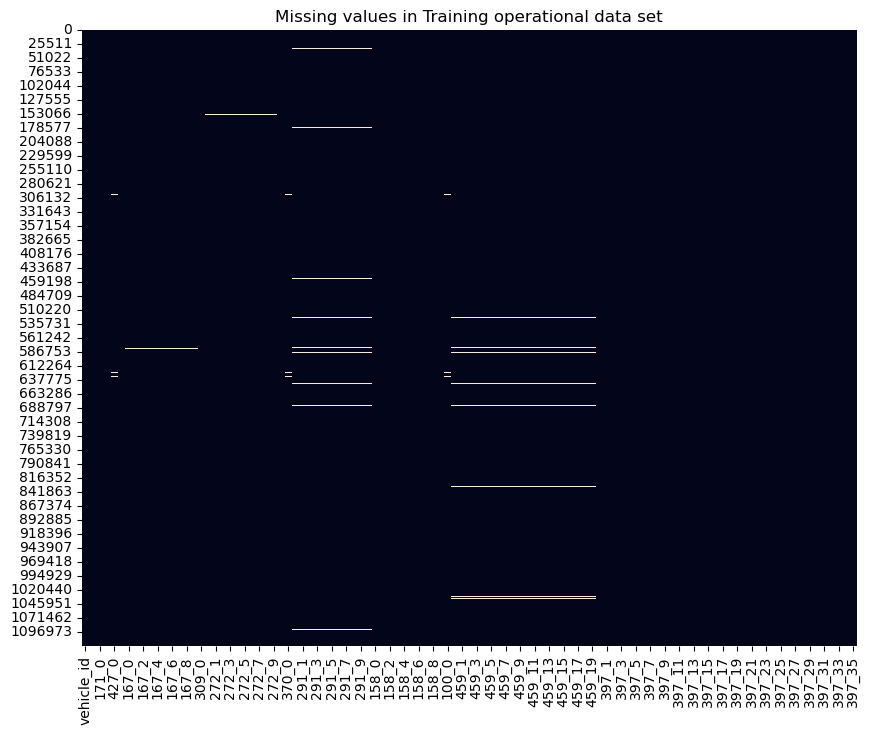

In [8]:
# checking for missing values
plt.figure(figsize = (10,8))
sns.heatmap(train_opr_df.isnull(), cbar=False)
plt.title("Missing values in Training operational data set")
plt.show()

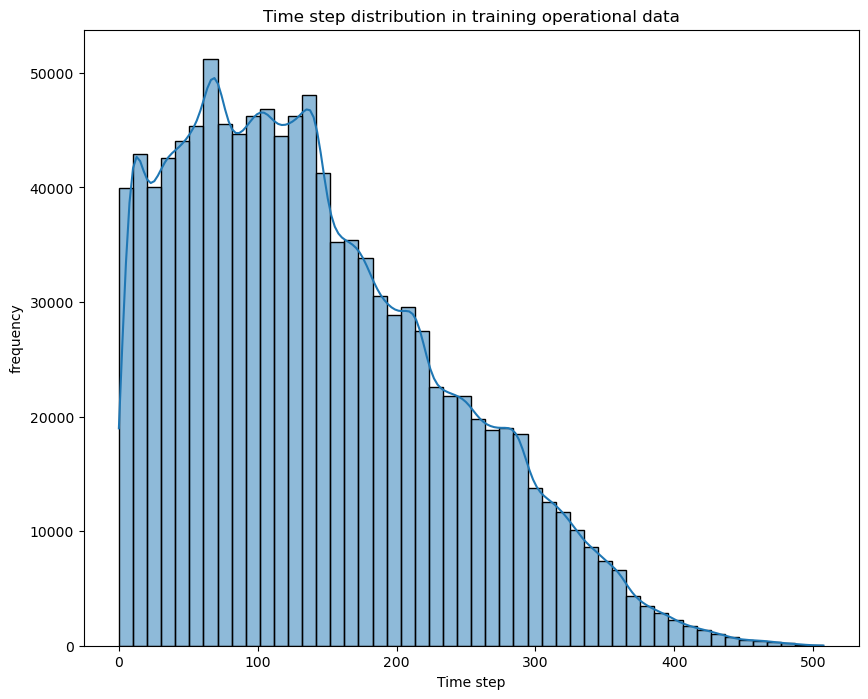

In [9]:
# distribution of time_steps
plt.figure(figsize = (10,8))
sns.histplot(train_opr_df['time_step'],bins=50, kde=True)
plt.title("Time step distribution in training operational data")
plt.xlabel("Time step")
plt.ylabel("frequency")
plt.savefig("time step dist.jpg")

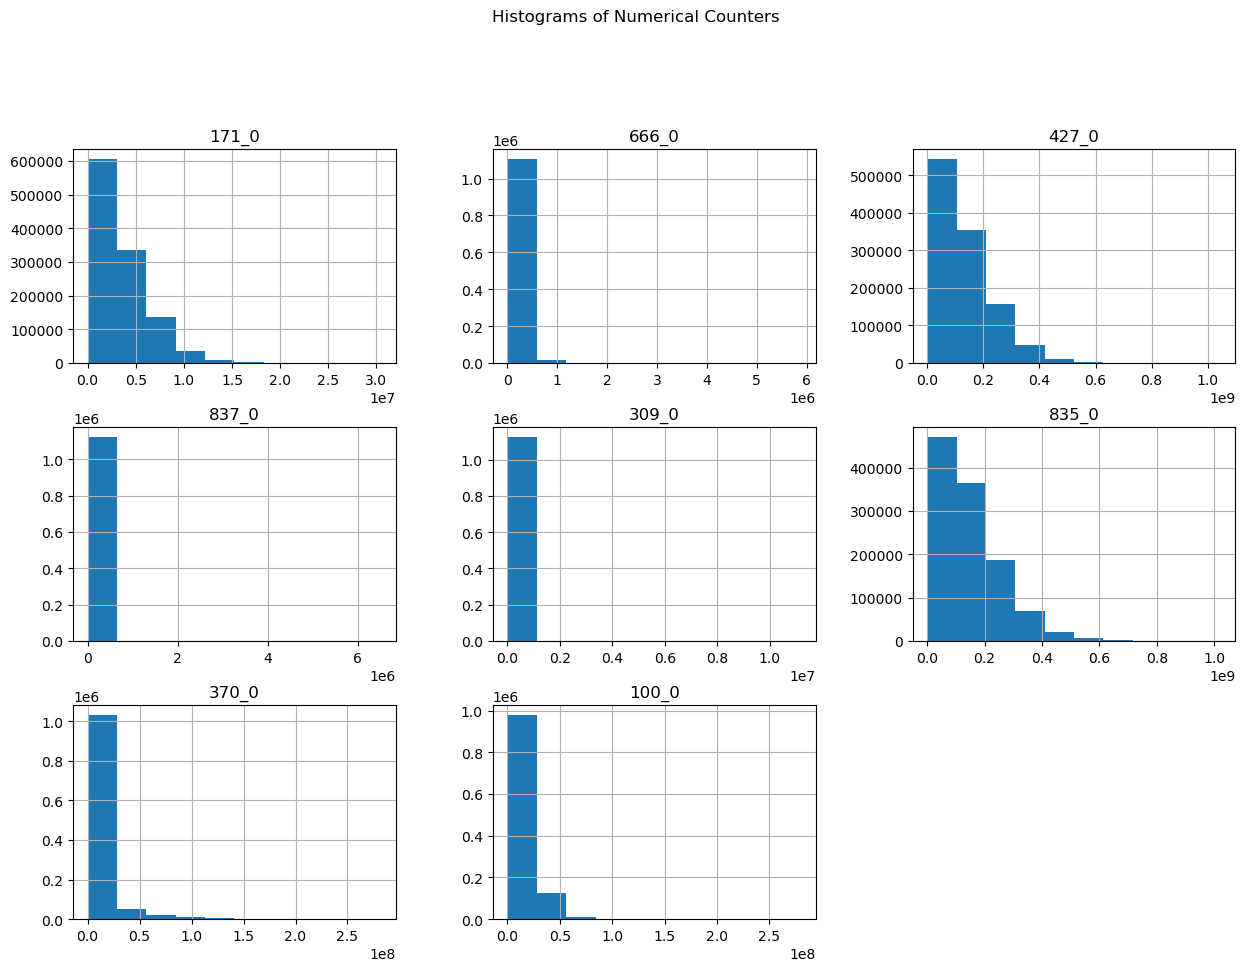

<Figure size 640x480 with 0 Axes>

In [10]:
## studying the distribution of numerical features:
numerical_cols = ['171_0', '666_0', '427_0', '837_0', '309_0', '835_0', '370_0', '100_0']
temp_df = train_opr_df.drop(['vehicle_id','time_step'], axis=1)
cat_cols = [col for col in temp_df.columns if col not in numerical_cols]
train_opr_df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Counters', y=1.02)
plt.show()
plt.savefig("num cols hist.png")

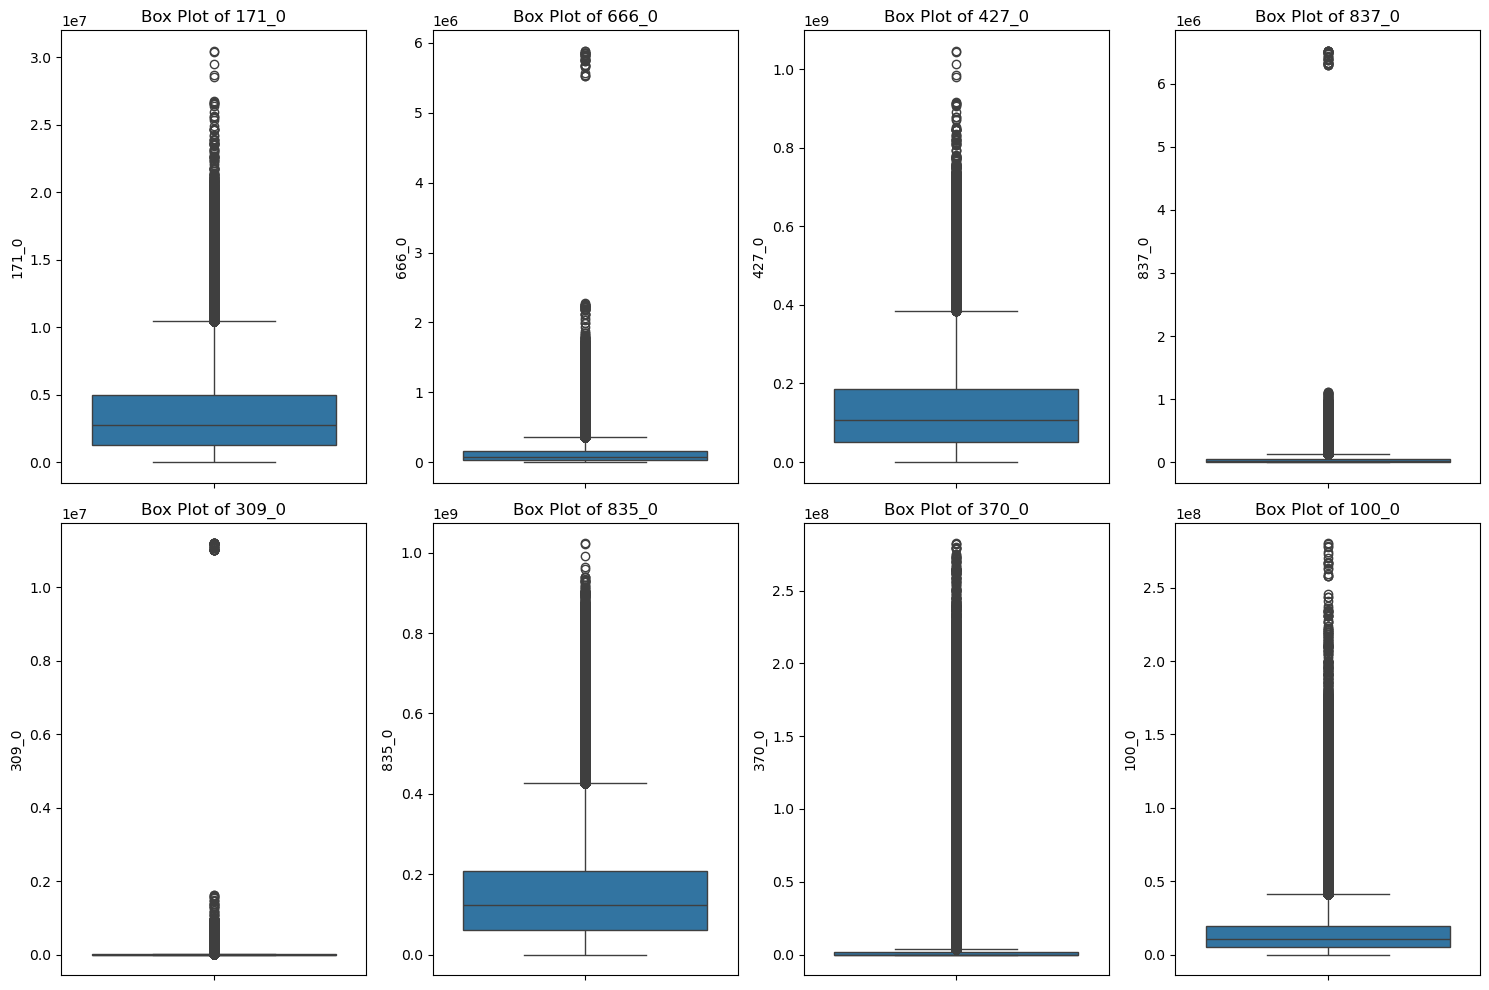

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=train_opr_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

The above observations show that for numerical columns, there are lot of outliers how ever their numerical nature expects them to have outliers as these parameters can be important sensor data that relays the state of the component at the given time stamp. these parameters can be RPM sensor reading, temperture/pressure readings, device condition monitoring sensors etc. hence these parameters play a crucial role in determining the remaining useful life of the component.

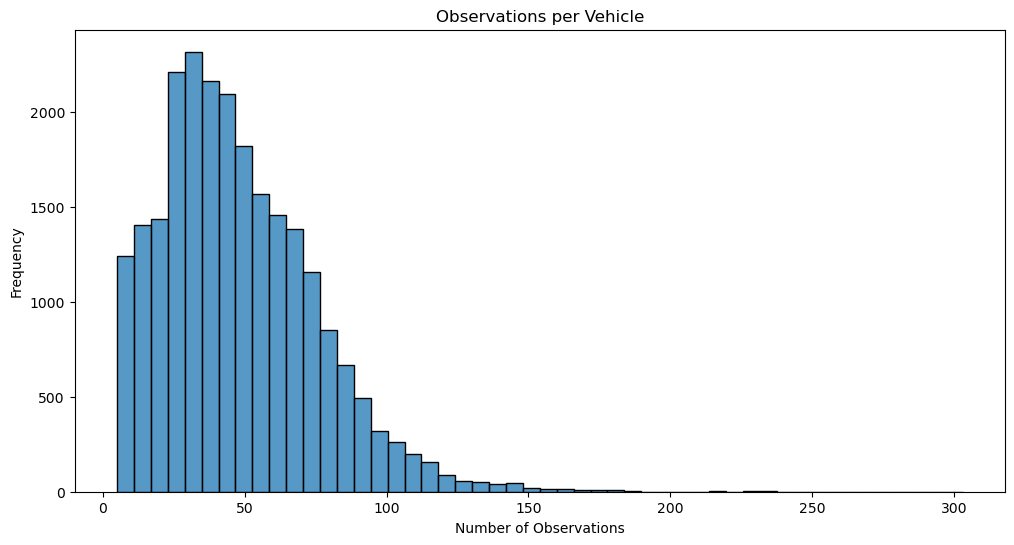

In [12]:
# per vehicle time step distribution:
observations_per_vehicle = train_opr_df['vehicle_id'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(observations_per_vehicle, bins=50)
plt.title('Observations per Vehicle')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

In [13]:
observations_per_vehicle = train_opr_df['vehicle_id'].value_counts()
print(observations_per_vehicle.head())

vehicle_id
2762    303
293     237
228     236
329     231
1888    230
Name: count, dtype: int64


In [14]:
## exploring other columns
nonnum_cols = {
    '167': [f'167_{i}' for i in range(10)],
    '272': [f'272_{i}' for i in range(10)],
    '291': [f'291_{i}' for i in range(11)],
    '158': [f'158_{i}' for i in range(10)],
    '459': [f'459_{i}' for i in range(20)],
    '397': [f'397_{i}' for i in range(36)]
}

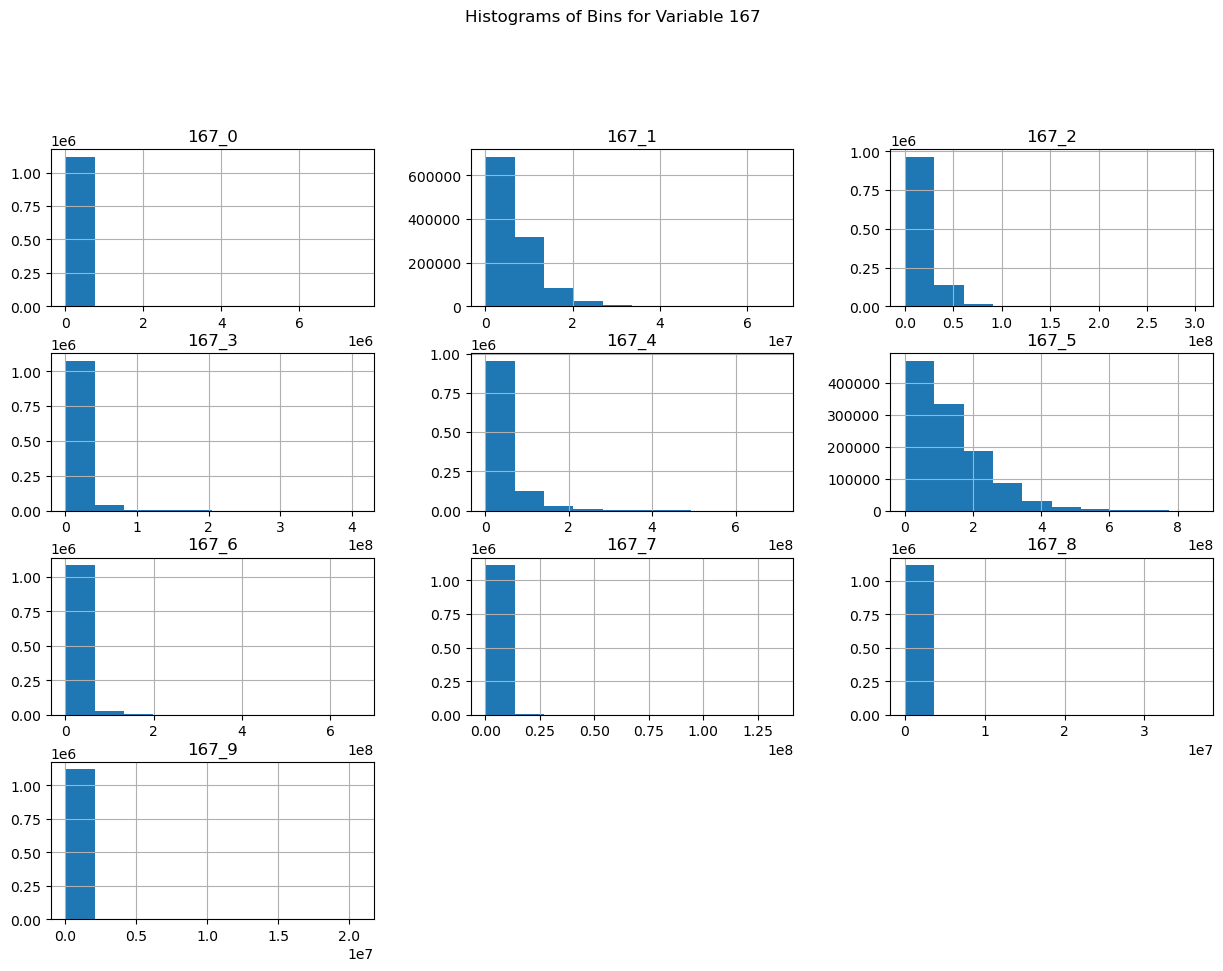

              167_0         167_1         167_2         167_3         167_4  \
count  1.119590e+06  1.119590e+06  1.119590e+06  1.119590e+06  1.119590e+06   
mean   1.231484e+04  6.578556e+06  1.647673e+07  1.348033e+07  3.948936e+07   
std    4.523900e+04  5.408065e+06  1.481707e+07  1.463525e+07  4.479542e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.320000e+02  2.640738e+06  6.241352e+06  4.709285e+06  1.239752e+07   
50%    3.570000e+03  5.276156e+06  1.275505e+07  9.788470e+06  2.625514e+07   
75%    1.299600e+04  9.018105e+06  2.237455e+07  1.747985e+07  4.986576e+07   
max    7.526577e+06  6.723617e+07  3.032439e+08  4.094330e+08  7.032086e+08   

              167_5         167_6         167_7         167_8         167_9  
count  1.119590e+06  1.119590e+06  1.119590e+06  1.119590e+06  1.119590e+06  
mean   1.291043e+08  1.616505e+07  1.237457e+06  1.130708e+05  2.513515e+04  
std    1.038244e+08  2.184020e+07  2.920862e+06  5.244

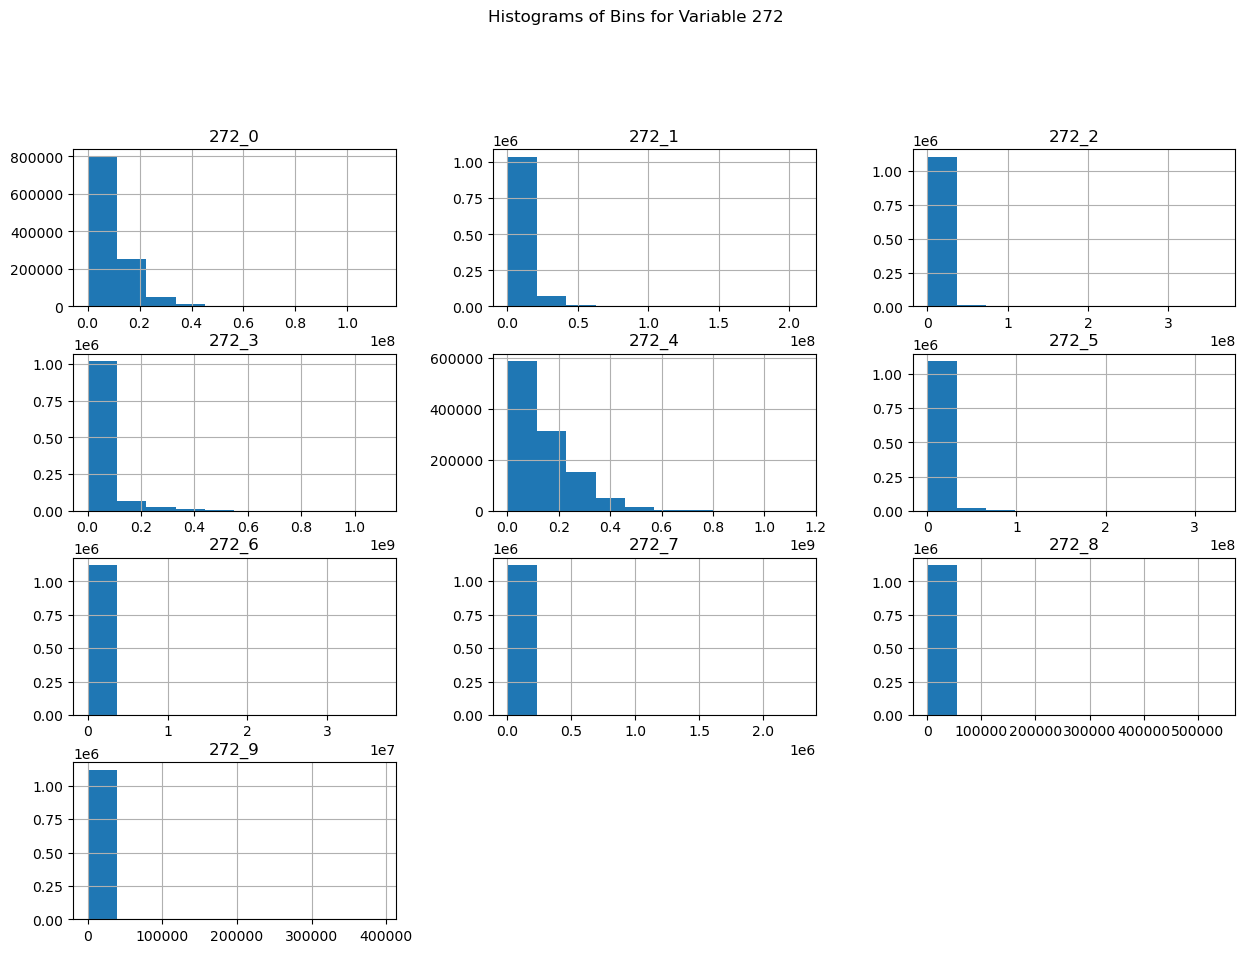

              272_0         272_1         272_2         272_3         272_4  \
count  1.121927e+06  1.121927e+06  1.121927e+06  1.121927e+06  1.121927e+06   
mean   9.095183e+06  8.871166e+06  6.888060e+06  3.545662e+07  1.335260e+08   
std    8.015971e+06  8.921667e+06  1.069562e+07  6.965757e+07  1.192697e+08   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.449884e+06  3.191300e+06  2.222834e+06  5.620590e+06  3.607161e+07   
50%    7.026333e+06  6.607915e+06  4.592760e+06  1.202496e+07  1.072755e+08   
75%    1.235292e+07  1.184421e+07  8.250888e+06  2.635503e+07  2.007354e+08   
max    1.130439e+08  2.083070e+08  3.650735e+08  1.099679e+09  1.142990e+09   

              272_5         272_6         272_7         272_8         272_9  
count  1.121927e+06  1.121927e+06  1.121927e+06  1.121927e+06  1.121927e+06  
mean   5.968650e+06  5.303856e+04  2.408601e+03  4.547189e+02  2.698576e+02  
std    1.142653e+07  3.013526e+05  3.511383e+04  7.235

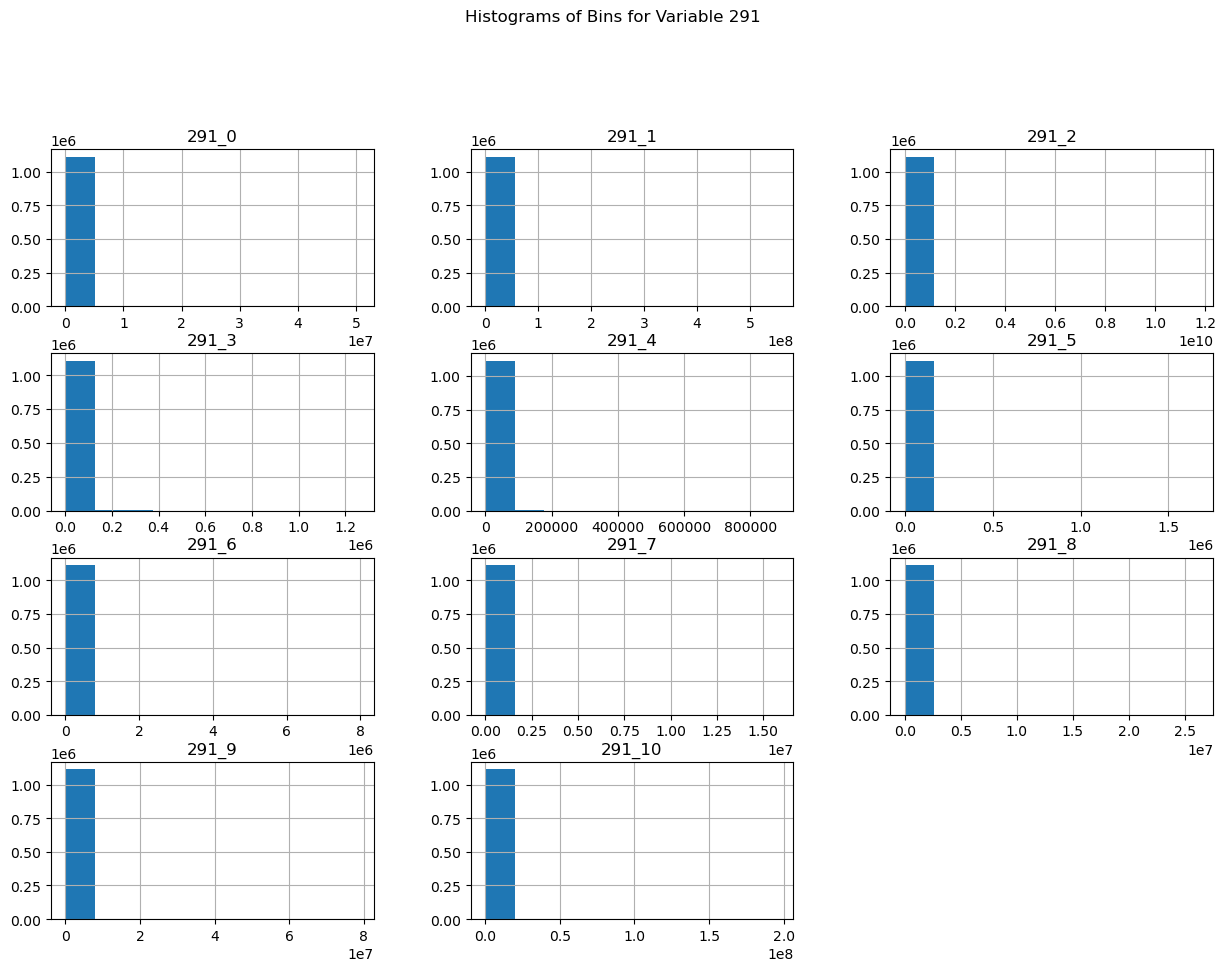

              291_0         291_1         291_2         291_3         291_4  \
count  1.112824e+06  1.112824e+06  1.112824e+06  1.112824e+06  1.112824e+06   
mean   2.458236e+04  6.254047e+04  1.036058e+06  1.963723e+04  6.725472e+03   
std    4.724309e+05  5.170522e+06  1.094849e+08  2.431065e+04  1.163433e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.872000e+03  4.541000e+03  4.665000e+03  6.817000e+03  2.206000e+03   
50%    1.245500e+04  9.485000e+03  9.705000e+03  1.406400e+04  4.626000e+03   
75%    2.400300e+04  1.761900e+04  1.779900e+04  2.514500e+04  8.461000e+03   
max    5.052946e+07  5.538476e+08  1.172737e+10  1.258941e+06  8.853590e+05   

              291_5         291_6         291_7         291_8         291_9  \
count  1.112824e+06  1.112824e+06  1.112824e+06  1.112824e+06  1.112824e+06   
mean   4.608888e+03  8.919470e+03  6.189571e+03  5.234454e+03  1.506462e+04   
std    1.645840e+04  7.486330e+04  1.478193e+05  2.

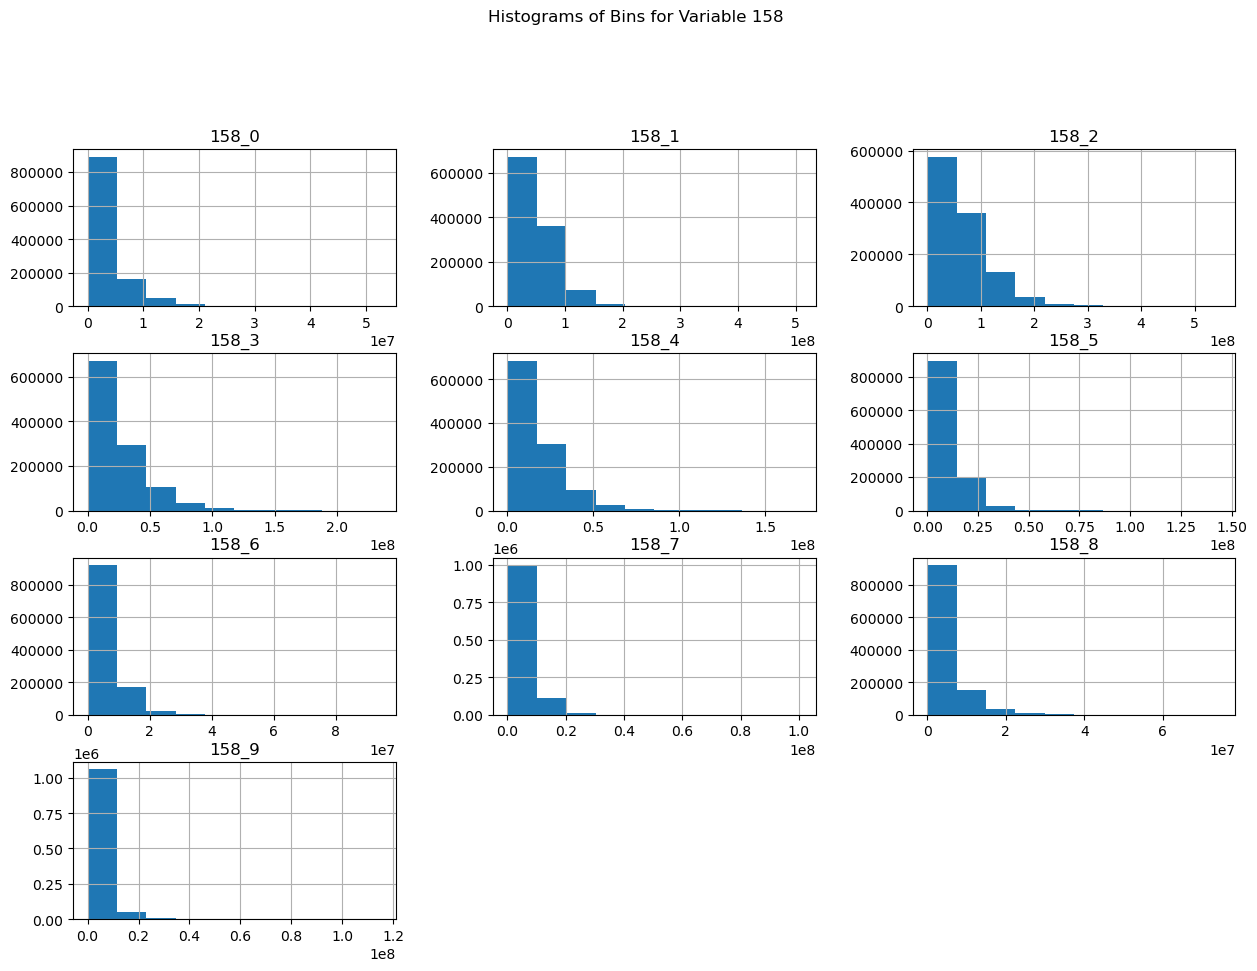

              158_0         158_1         158_2         158_3         158_4  \
count  1.121804e+06  1.121804e+06  1.121804e+06  1.121804e+06  1.121804e+06   
mean   3.089379e+06  4.828619e+07  6.459712e+07  2.484140e+07  1.706263e+07   
std    4.000282e+06  3.666100e+07  5.191559e+07  2.264468e+07  1.498001e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.181312e+05  2.052145e+07  2.617826e+07  8.606923e+06  6.127723e+06   
50%    1.511268e+06  4.149581e+07  5.326831e+07  1.859503e+07  1.318560e+07   
75%    4.355550e+06  6.817088e+07  9.042316e+07  3.427772e+07  2.382706e+07   
max    5.269308e+07  5.091744e+08  5.490319e+08  2.355235e+08  1.707386e+08   

              158_5         158_6         158_7         158_8         158_9  
count  1.121804e+06  1.121804e+06  1.121804e+06  1.121804e+06  1.121804e+06  
mean   9.259272e+06  5.636848e+06  4.753604e+06  4.354528e+06  2.592706e+06  
std    8.393817e+06  5.297305e+06  4.684814e+06  4.957

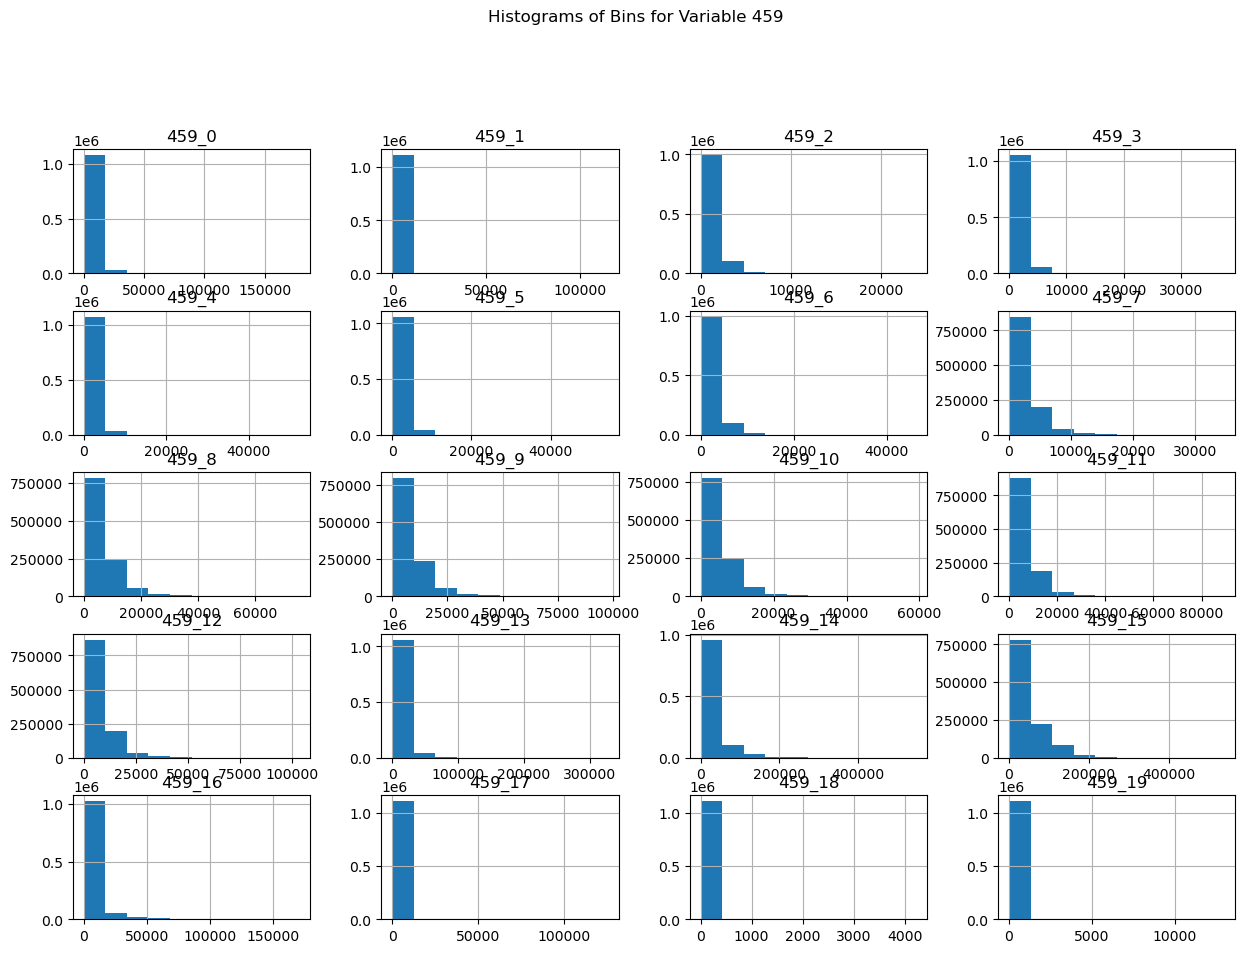

              459_0         459_1         459_2         459_3         459_4  \
count  1.114099e+06  1.114099e+06  1.114099e+06  1.114099e+06  1.114099e+06   
mean   4.258535e+03  1.169722e+03  1.173479e+03  1.380093e+03  1.625984e+03   
std    5.997624e+03  1.442711e+03  1.096282e+03  1.327374e+03  1.619487e+03   
min    3.240278e-01  1.479444e-01  1.090278e-01  0.000000e+00  0.000000e+00   
25%    1.213985e+03  4.357974e+02  4.444453e+02  5.022648e+02  5.731522e+02   
50%    2.595937e+03  8.787439e+02  9.006592e+02  1.025319e+03  1.178557e+03   
75%    4.934977e+03  1.520909e+03  1.573247e+03  1.835537e+03  2.153427e+03   
max    1.787168e+05  1.145650e+05  2.393247e+04  3.760350e+04  5.224018e+04   

              459_5         459_6         459_7         459_8         459_9  \
count  1.114099e+06  1.114099e+06  1.114099e+06  1.114099e+06  1.114099e+06   
mean   1.849545e+03  2.204264e+03  2.558352e+03  6.355295e+03  8.025213e+03   
std    1.884419e+03  2.229143e+03  2.551331e+03  6.

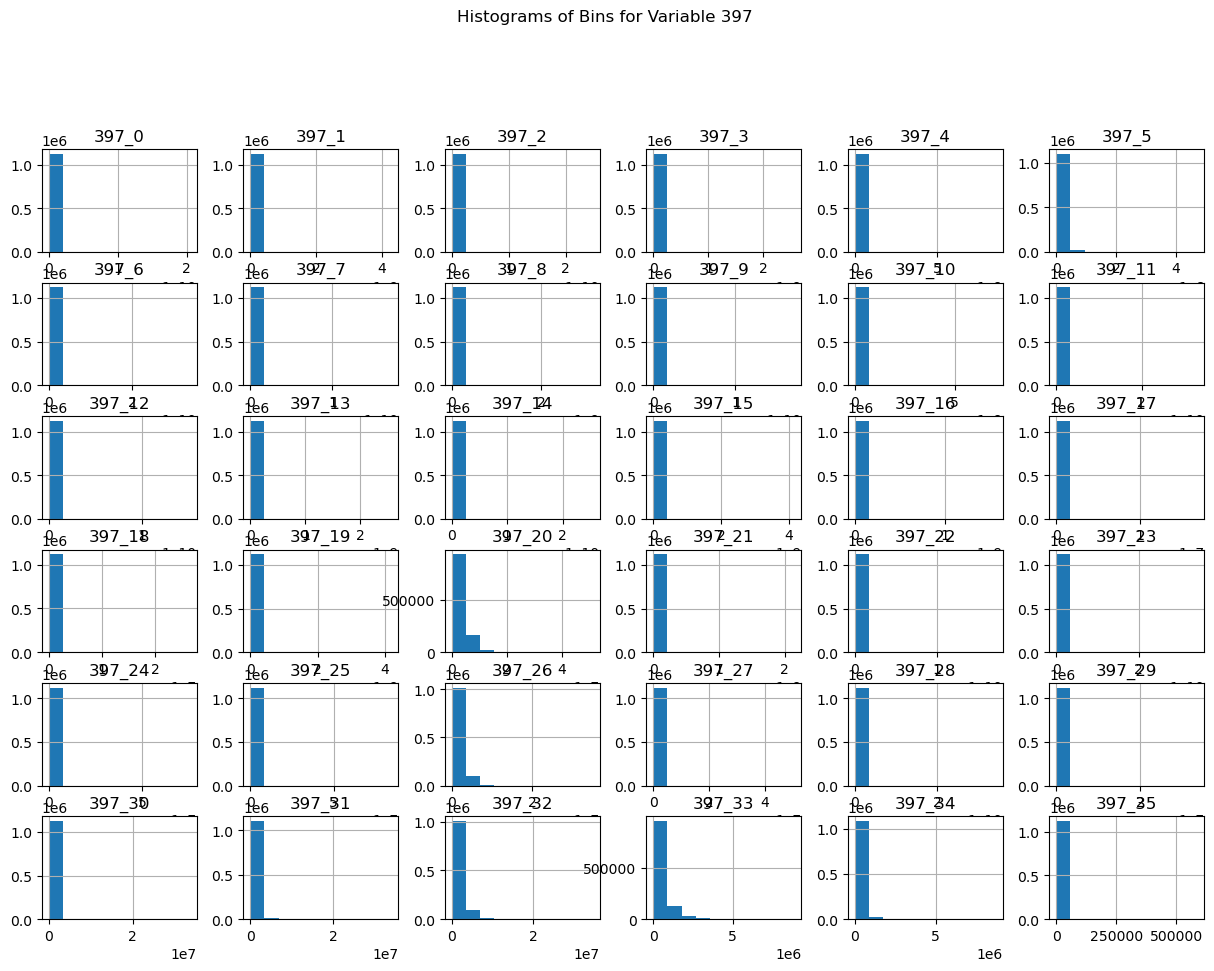

              397_0         397_1         397_2         397_3         397_4  \
count  1.121842e+06  1.121842e+06  1.121842e+06  1.121842e+06  1.121842e+06   
mean   1.144664e+07  6.736448e+06  6.528357e+06  6.912555e+05  6.375934e+05   
std    1.270384e+08  2.699868e+07  1.552640e+08  1.586227e+07  5.320051e+07   
min    1.200000e+01  1.600000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.224877e+06  2.646978e+06  1.825747e+06  1.463660e+05  6.483525e+04   
50%    7.889388e+06  5.366132e+06  4.130627e+06  3.369800e+05  1.707730e+05   
75%    1.485794e+07  9.198015e+06  7.749890e+06  7.054602e+05  3.864252e+05   
max    2.047090e+10  4.287284e+09  2.472178e+10  2.559794e+09  8.593610e+09   

              397_5         397_6         397_7         397_8         397_9  \
count  1.121842e+06  1.121842e+06  1.121842e+06  1.121842e+06  1.121842e+06   
mean   6.056488e+04  7.364856e+06  4.162901e+06  7.306592e+06  9.836996e+05   
std    1.323188e+05  2.101385e+08  1.076129e+08  2.

In [15]:
for var_id, bins in nonnum_cols.items():
    train_opr_df[bins].hist(figsize=(15, 10))
    plt.suptitle(f'Histograms of Bins for Variable {var_id}', y=1.02)
    plt.show()
    print(train_opr_df[bins].describe())



2.4 Correlation Analysis


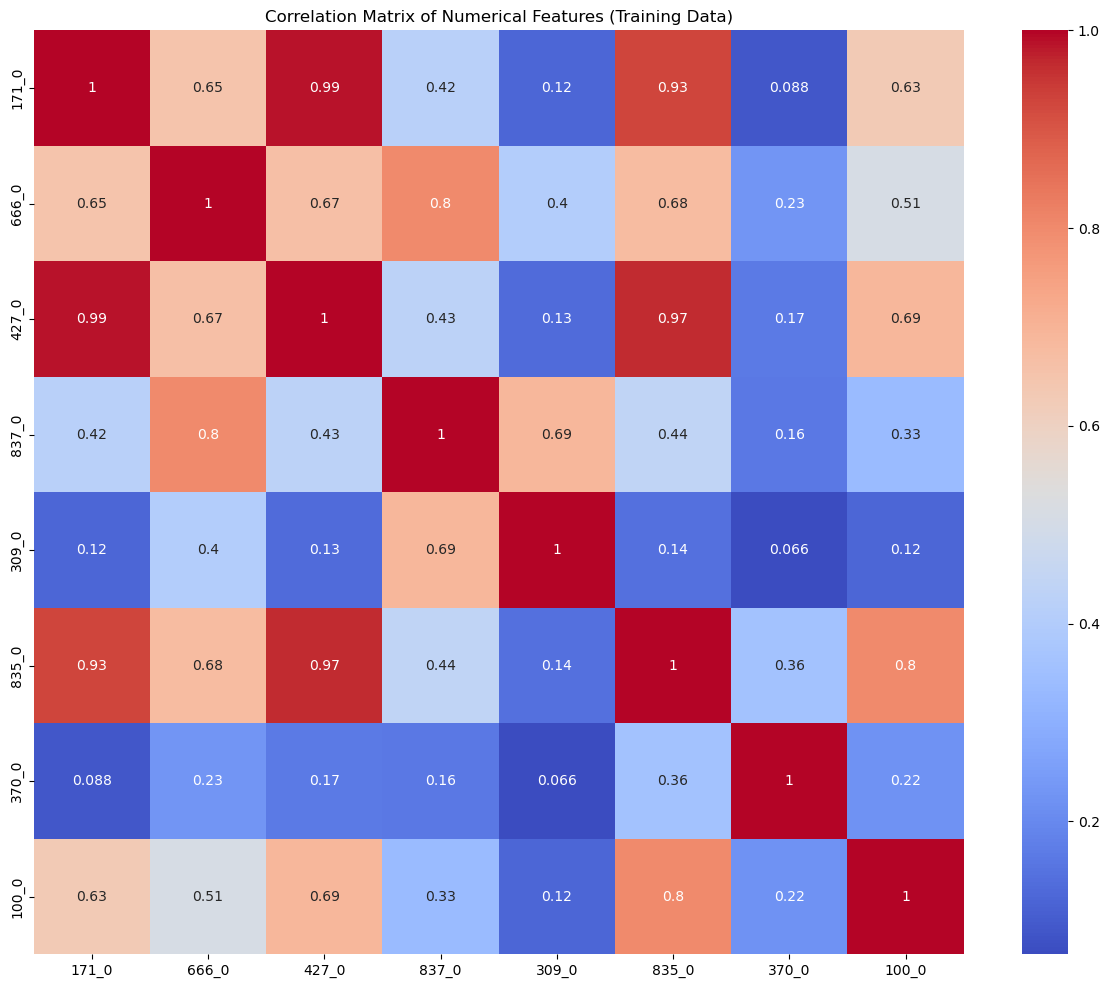

<Figure size 640x480 with 0 Axes>

In [16]:
print("\n2.4 Correlation Analysis")
correlation_matrix_train = train_opr_df[numerical_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features (Training Data)')
plt.show()
plt.savefig('num cols correlation')

In [17]:
train_merged_df = pd.merge(train_opr_df, train_tte_df, on="vehicle_id")
train_merged_df.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35,length_of_study_time_step,in_study_repair
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8036751.0,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,858410.0,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0,510.0,0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8040811.0,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,860571.0,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0,510.0,0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,12777022.0,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,1379191.0,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0,510.0,0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,13612083.0,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,1565484.0,1112544.0,789228.0,774588.0,1015104.0,576901.0,1428606.0,331.479028,162.731639,198.104472,269.712889,320.087333,377.478667,425.901361,495.749583,1173.882583,1323.460972,923.099361,1161.893139,1501.973944,2208.782833,5587.856667,1160.593833,3.336417,0.218806,0.056778,0.058444,812577.0,686860.0,302955.0,31927.0,31488.0,77

In [18]:
train_merged_df['RUL'] = train_merged_df['length_of_study_time_step']-train_merged_df['time_step']

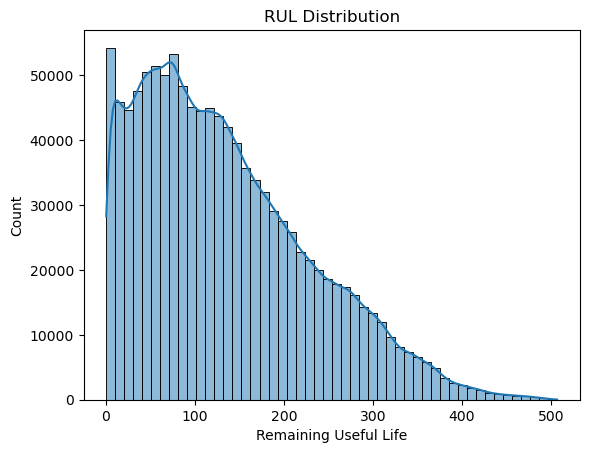

In [19]:
sns.histplot(train_merged_df['RUL'], bins=50, kde=True)
plt.title("RUL Distribution")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Count")
plt.show()

In [20]:
train_spec_df.head()

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1


In [21]:
train_df = pd.merge(train_merged_df, train_spec_df,on='vehicle_id')
train_df.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35,length_of_study_time_step,in_study_repair,RUL,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8036751.0,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,858410.0,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0,510.0,0,498.8,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8040811.0,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,860571.0,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0,510.0,0,498.6,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,12777022.0,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,1379191.0,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0,510.0,0,490.4,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,13612083.0,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,1565484.0,1112544.0,789228.0,774588.0,1015104.0,576901.0,1428606.0,331.479028,162.731639,198.104472,269.712889,320.087333,377.478667,

In [22]:
temp_df = train_spec_df.drop('vehicle_id',axis=1)
cat_cols = temp_df.columns.tolist()
cat_cols

['Spec_0',
 'Spec_1',
 'Spec_2',
 'Spec_3',
 'Spec_4',
 'Spec_5',
 'Spec_6',
 'Spec_7']

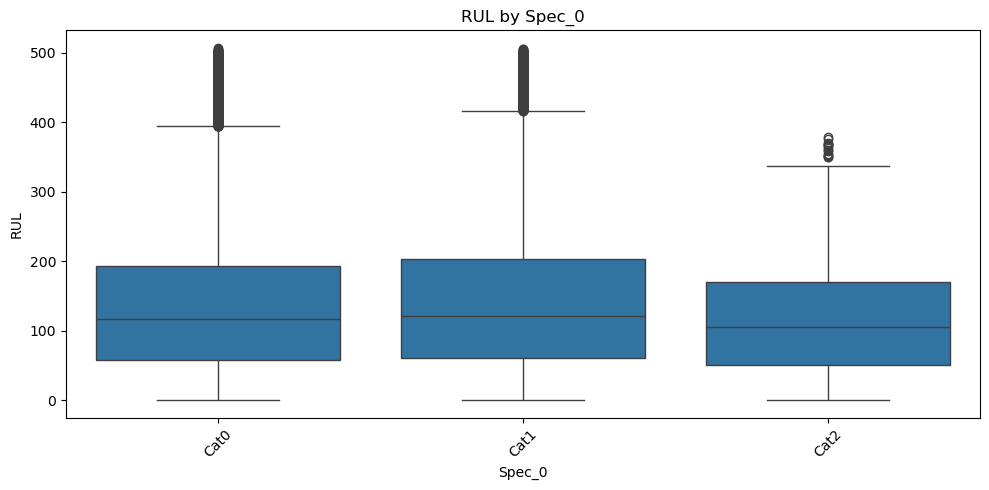

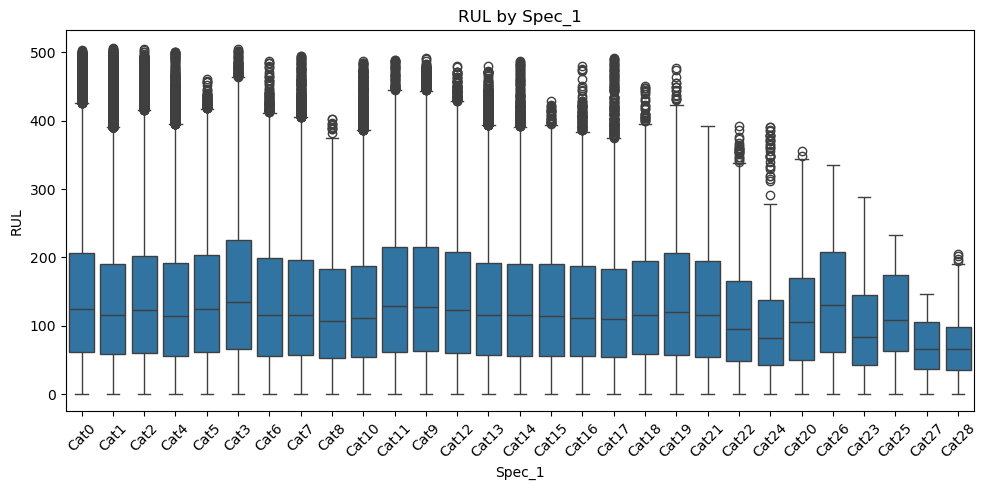

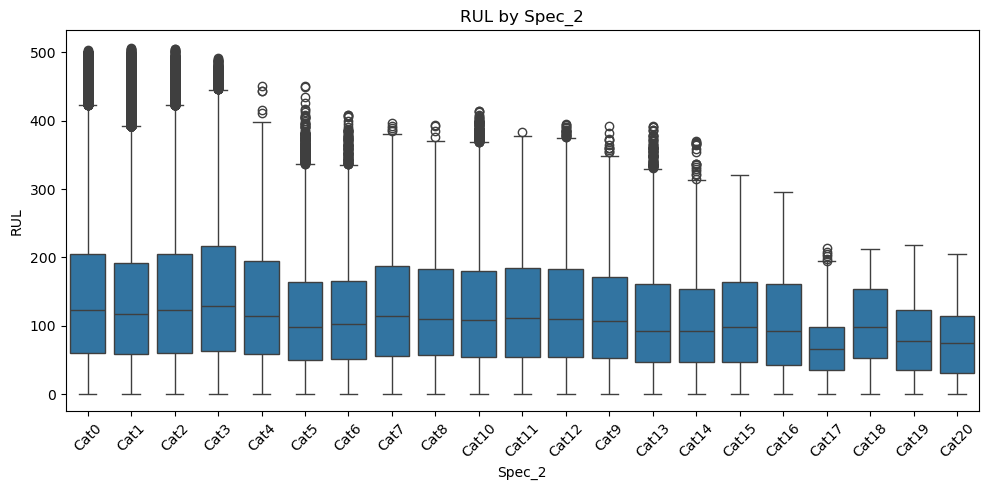

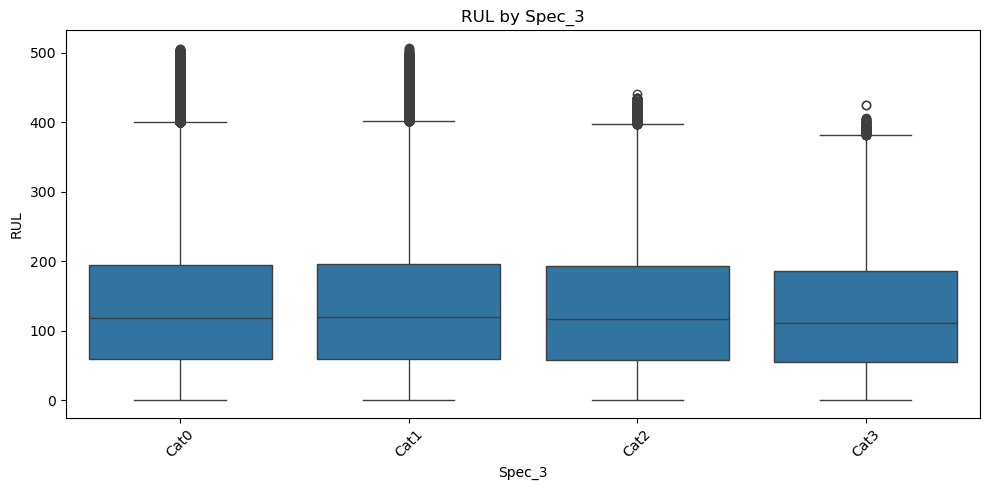

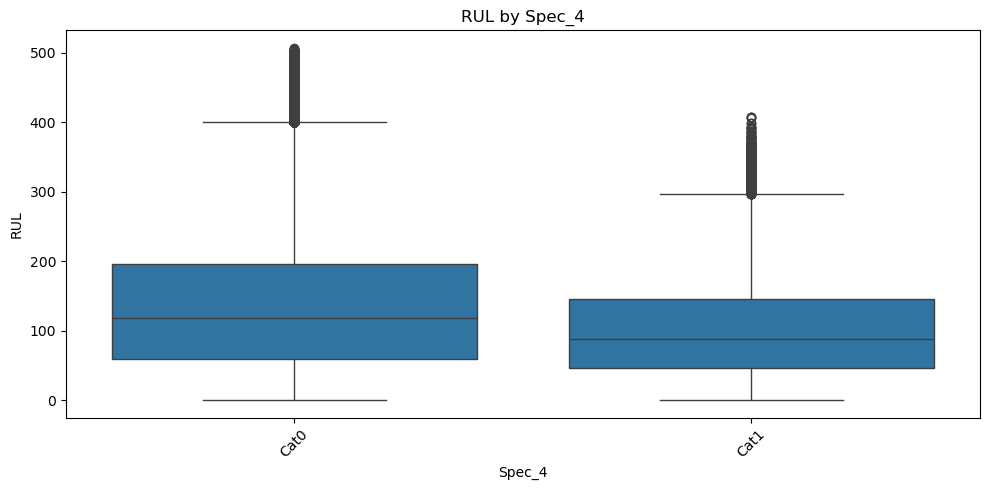

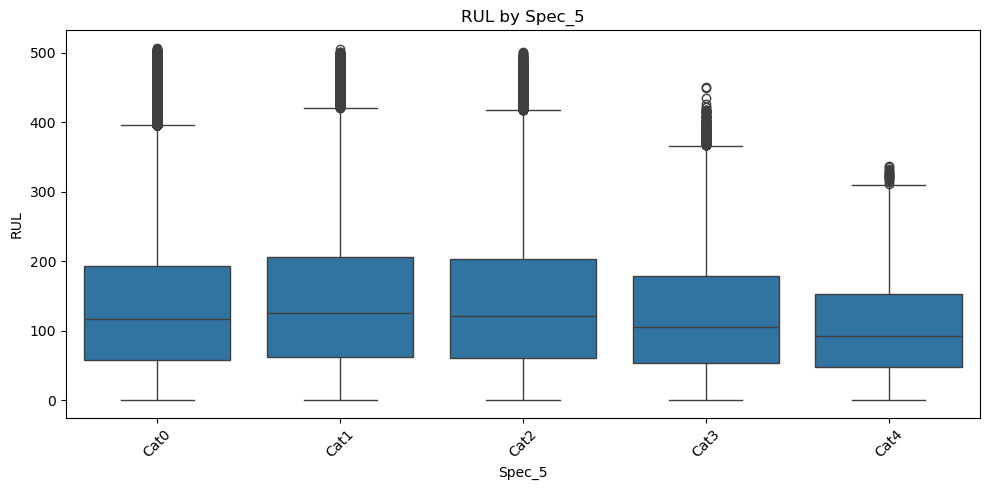

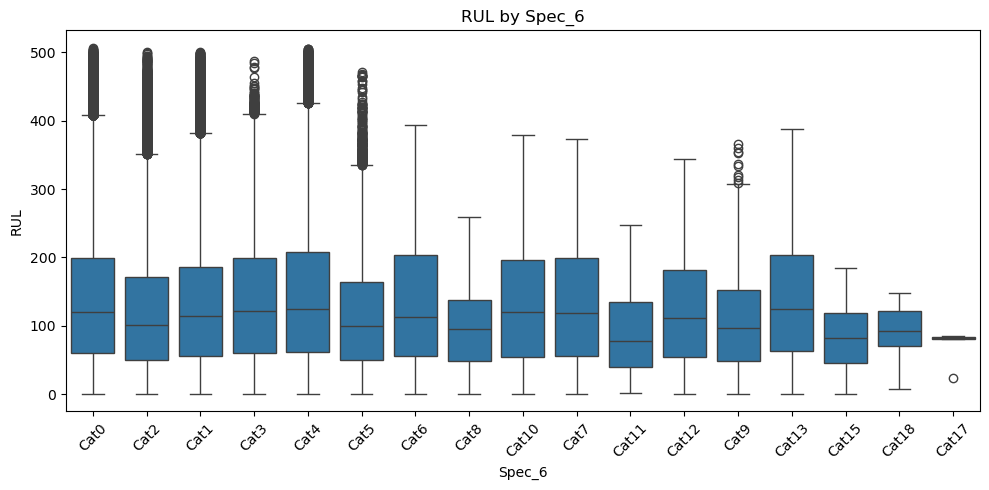

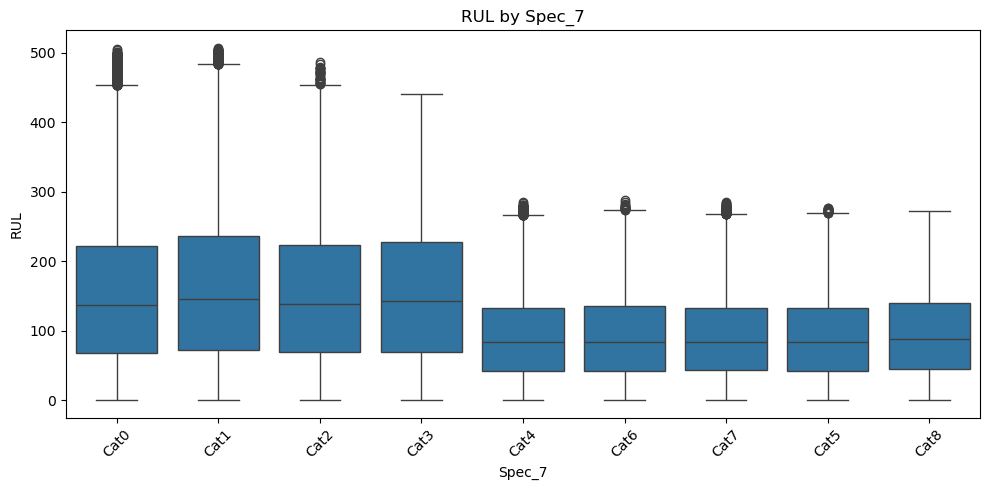

In [23]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x=col, y='RUL')
    plt.title(f"RUL by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Preprocessing: Handling missing,  Sparse, Skewed, and Correlated Features

In [24]:
train_df.fillna(train_df.median(numeric_only=True), inplace=True)

In [25]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

In [26]:
#Removing sparse columns with over 99.5% zeros or same value as these coloumns are too skewed and may lead to over-fitting the prediction model.
sparse_cols = [col for col in train_df.columns if train_df[col].nunique() <= 1 or (train_df[col] == 0).mean() > 0.995]
train_df1 = train_df.drop(columns=sparse_cols)
train_df1.head(100)

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35,length_of_study_time_step,in_study_repair,RUL,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8036751.0,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,858410.0,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0,510.0,0,498.8,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,8040811.0,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,860571.0,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0,510.0,0,498.6,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,70.0,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,12777022.0,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,1379191.0,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0,510.0,0,490.4,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,70.0,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,13612083.0,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,1565484.0,1112544.0,789228.0,77

In [27]:
# 1.2 Handling skewed numerical columns with log1p
skewed_cols = train_df[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > 1].index.tolist()

train_df[skewed_cols] = train_df[skewed_cols].apply(lambda x: np.log1p(x))


In [28]:
train_df.head(10)

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35,length_of_study_time_step,in_study_repair,RUL,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,11.2,12.031636,9.286190,15.818856,7.739359,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,4.26268,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,15.899536,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,13.662838,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0,510.0,0,498.8,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,0,11.4,12.031636,9.286190,15.818856,7.739359,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,4.26268,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,15.900041,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,13.665353,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0,510.0,0,498.6,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
2,0,19.6,12.711793,9.583695,16.431709,7.863651,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,4.26268,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,16.363159,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,14.137008,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0,510.0,0,490.4,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
3,0,20.2,12.779805,9.616872,16.492445,7.869784,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,4.26268,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,16.426468,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,15654

In [29]:
#Dropping one of each pair of highly correlated features
corr_matrix = train_df[numerical_cols].corr().abs()
corr_matrix

,171_0,666_0,427_0,837_0,309_0,835_0,370_0,100_0
171_0,1.000000,0.751075,0.985473,0.504742,0.391450,0.959827,0.080120,0.838301
666_0,0.751075,1.000000,0.742751,0.832009,0.664219,0.737669,0.073667,0.659050
427_0,0.985473,0.742751,1.000000,0.485204,0.383813,0.976523,0.021643,0.881760
837_0,0.504742,0.832009,0.485204,1.000000,0.856954,0.469361,0.047802,0.397260
309_0,0.391450,0.664219,0.383813,0.856954,1.000000,0.382225,0.092606,0.340349
835_0,0.959827,0.737669,0.976523,0.469361,0.382225,1.000000,0.088256,0.924695
370_0,0.080120,0.073667,0.021643,0.047802,0.092606,0.088256,1.000000,0.128352
100_0,0.838301,0.659050,0.881760,0.397260,0.340349,0.924695,0.128352,1.000000


In [30]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]
train_opr_df.drop(columns=to_drop, inplace=True)

In [31]:
train_df.head(10)

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,272_8,272_9,835_0,370_0,291_0,291_1,291_2,291_3,291_4,291_5,291_6,291_7,291_8,291_9,291_10,158_0,158_1,158_2,158_3,158_4,158_5,158_6,158_7,158_8,158_9,100_0,459_0,459_1,459_2,459_3,459_4,459_5,459_6,459_7,459_8,459_9,459_10,459_11,459_12,459_13,459_14,459_15,459_16,459_17,459_18,459_19,397_0,397_1,397_2,397_3,397_4,397_5,397_6,397_7,397_8,397_9,397_10,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35,length_of_study_time_step,in_study_repair,RUL,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,11.2,12.031636,9.286190,15.818856,7.739359,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,4.26268,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,15.899536,0.0,1227.0,555.0,463.0,925.0,468.0,225.0,535.0,516.0,492.0,729.0,66.0,97056.0,2690052.0,2945268.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,13.662838,203.676778,111.911500,147.265389,200.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,744.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446956.0,411420.0,203024.0,26636.0,29156.0,7616.0,449537.0,233352.0,139920.0,12648.0,2813.0,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0,510.0,0,498.8,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,0,11.4,12.031636,9.286190,15.818856,7.739359,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,4.26268,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,0.0,0.0,15.900041,0.0,1230.0,558.0,463.0,925.0,469.0,226.0,535.0,516.0,493.0,729.0,66.0,97056.0,2693100.0,2947368.0,788437.0,687480.0,595164.0,491232.0,532932.0,809628.0,505693.0,13.665353,204.256750,112.924250,147.265389,201.479944,230.306278,277.722417,315.748806,372.164528,864.246250,920.881111,637.901639,745.618944,880.866889,1272.323972,1847.623667,940.785694,2.900083,0.208444,0.056417,0.058444,446964.0,411420.0,203027.0,26638.0,29157.0,7616.0,451193.0,233354.0,139920.0,12649.0,2813.0,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0,510.0,0,498.6,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
2,0,19.6,12.711793,9.583695,16.431709,7.863651,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,4.26268,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,0.0,0.0,16.363159,0.0,2136.0,954.0,850.0,1420.0,722.0,412.0,880.0,666.0,586.0,1143.0,162.0,181632.0,4249020.0,4630440.0,1539133.0,1421172.0,1039764.0,749472.0,740724.0,995796.0,574045.0,14.137008,321.671972,157.312500,193.792833,263.577611,310.711861,366.149250,415.642472,484.391167,1146.111611,1286.536333,900.062917,1123.232556,1449.545611,2140.037472,5046.748278,1151.010139,3.320194,0.218806,0.056778,0.058444,756665.0,647348.0,286811.0,30967.0,31213.0,7745.0,633790.0,423395.0,271940.0,16190.0,3573.0,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0,510.0,0,490.4,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
3,0,20.2,12.779805,9.616872,16.492445,7.869784,3570.0,5276155.5,12755046.5,9788470.0,26255135.5,105788147.5,9535204.0,385592.5,7680.0,0.0,4.26268,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,0.0,0.0,16.426468,0.0,2218.0,1014.0,892.0,1471.0,749.0,425.0,901.0,702.0,589.0,1197.0,174.0,193728.0,4462548.0,4988028.0,1696022.0,15654

In [32]:
Spec_cols = ['Spec_0','Spec_1','Spec_2','Spec_3','Spec_4','Spec_5','Spec_6','Spec_7']
from sklearn.preprocessing import LabelEncoder
for col in Spec_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])

In [33]:
train_df.shape

(1122452, 118)

In [34]:
from skrebate import ReliefF
from sklearn.preprocessing import MinMaxScaler
train_X = train_df.drop(columns = ['RUL', 'vehicle_id', 'time_step', 'length_of_study_time_step', 'in_study_repair', 'Spec_0','Spec_1','Spec_2','Spec_3','Spec_4','Spec_5','Spec_6','Spec_7'])
train_Y = train_df['RUL']

scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(train_X)
rul_scaler = MinMaxScaler()
y_scaled = rul_scaler.fit_transform(train_Y.values.reshape(-1, 1))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size =0.3, random_state =42)

## Combination-1 PCA + CNN-LSTM model

In [36]:
## Trying PCA selection:
from sklearn.decomposition import PCA
X_train_df = pd.DataFrame(X_train, columns = train_X.columns)
X_test_df = pd.DataFrame(X_test, columns = train_X.columns)
pca = PCA(n_components = 90)
X_train_pca = pca.fit_transform(X_train_df)
X_test_pca = pca.fit_transform(X_test_df)

In [37]:
# model building  using CNN-LSTM model:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPooling1D, Dense, Dropout, TimeDistributed, Flatten

# Parameters
window_size = 10  # Number of time steps in each sequence
n_features = X_train_pca.shape[1]

# Reshape data into sequences
def create_sequences(X, y, window):
    X_seq, y_seq = [], []
    for i in range(len(X) - window):
        X_seq.append(X[i:i+window])
        y_seq.append(y[i + window])  # FIXED LINE
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_train_pca, y_train, window_size)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),  # You could stack more LSTMs with return_sequences=True
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Predicting RUL
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_seq, y_seq, validation_split=0.2, epochs=20, batch_size=64)

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,593 (213.25 KB)

 Trainable params: 54,593 (213.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0363 - mae: 0.1549 - val_loss: 0.0355 - val_mae: 0.1545
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1532
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1537
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1542
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1536
Epoch 9/20
9822/9822 ━━━━━━━━━━━

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 7s 654us/step - loss: 0.0355 - mae: 0.1525
Test MAE: 0.15 | Test MSE: 0.04


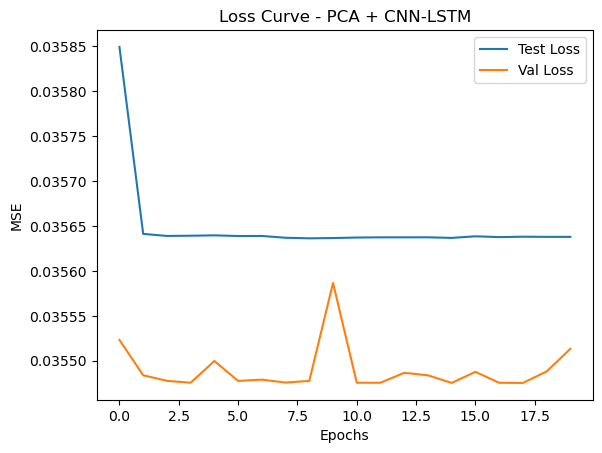

In [38]:
## testing the data on test dataset
X_test_seq, y_test_seq = create_sequences(X_test_pca, y_test, window_size)
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f'Test MAE: {mae:.2f} | Test MSE: {loss:.2f}')

# Plot learning curve
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - PCA + CNN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test_seq)
print(type(y_pred))
print(y_pred.shape)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 6s 555us/step
<class 'numpy.ndarray'>
(336726, 1)


In [40]:
# Example
y_pred_actual = rul_scaler.inverse_transform(y_pred)
y_test_actual = rul_scaler.inverse_transform(y_test_seq)
print(y_pred_actual.shape)
print(y_test_actual.shape)

(336726, 1)
(336726, 1)


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.37
Actual MSE: 9128.07


The above combination of PCA feature selection along with CNN-LSTM model is not giving out close predictions to the actual values of RUL. The for the range of RUL values, the Mean absolute error is 78 which is close to the mean of RUL values in the entire dataset, which means the difference between predicted RUL and actual RUL is close to 78 time units which is a huge difference considering the fact that the component might fail before the predicted time or much after the predicted time. So, this combination of PCA+CNN-LSTM will not be a good combination.

## DBN-LSTM model on PCA selection features

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0366 - mae: 0.1552 - val_loss: 0.0358 - val_mae: 0.1518
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1532
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1531
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0356 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.0358 - mae: 0.1542 - val_loss: 0.0355 - val_mae: 0.1531
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1530
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1544
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 9/20
9822/9822 ━━━━━━━━━━━

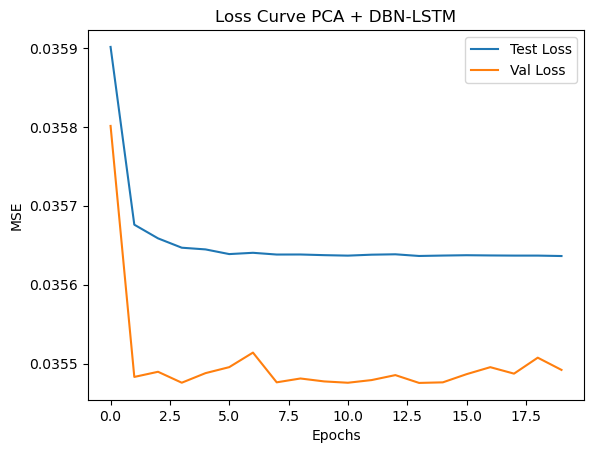

In [42]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert y to 1D array if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# -------- DBN Layer using RBM --------
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, random_state=42)

X_train_rbm = rbm1.fit_transform(X_train_pca)
X_train_rbm = rbm2.fit_transform(X_train_rbm)

X_test_rbm = rbm1.transform(X_test_pca)
X_test_rbm = rbm2.transform(X_test_rbm)

# ------ Convert DBN output to sequences for LSTM ------
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(X_train_rbm, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_rbm, y_test, window_size)

# ------ LSTM Model ------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ------ Train ------
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

# ------ Evaluate ------
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {loss:.2f} | Test MAE: {mae:.2f}")
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve PCA + DBN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [43]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 8s 753us/step


In [44]:
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.49
Actual MSE: 9122.32


## Combination-2 : Univariate feature selection + CNN-LSTM

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression
X_train_df = pd.DataFrame(X_train, columns = train_X.columns)
X_test_df = pd.DataFrame(X_test, columns = train_X.columns)
selector = SelectKBest(score_func=f_regression, k=20)
X_train_kbest = selector.fit_transform(X_train, y_train.ravel())

# Get selected feature names
selected_features = X_train_df.columns[selector.get_support()]
X_train_kbest = pd.DataFrame(X_train_kbest, columns=selected_features, index=X_train_df.index)
X_test_kbest = pd.DataFrame(X_test_df[selected_features], columns=selected_features, index=X_test_df.index)

In [47]:
# model building  using CNN-LSTM model:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPooling1D, Dense, Dropout, TimeDistributed, Flatten

# Assuming X_pca is your input PCA-transformed feature set and y is the RUL target

# Parameters
window_size = 10  # Number of time steps in each sequence
n_features = X_train_kbest.shape[1]

# Reshape data into sequences
def create_sequences(X, y, window):
    X_seq, y_seq = [], []
    for i in range(len(X) - window):
        X_seq.append(X[i:i+window])
        y_seq.append(y[i + window])  # FIXED LINE
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_train_kbest, y_train, window_size)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_seq, y_seq, validation_split=0.2, epochs=20, batch_size=64)

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 8, 64)          │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,153 (160.75 KB)

 Trainable params: 41,153 (160.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0366 - mae: 0.1554 - val_loss: 0.0355 - val_mae: 0.1530
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0358 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1532
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1542
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1539
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1537
Epoch 9/20
9822/9822 ━━━━━━━━━━━

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 6s 564us/step - loss: 0.0355 - mae: 0.1527
Test MAE: 0.15 | Test MSE: 0.04


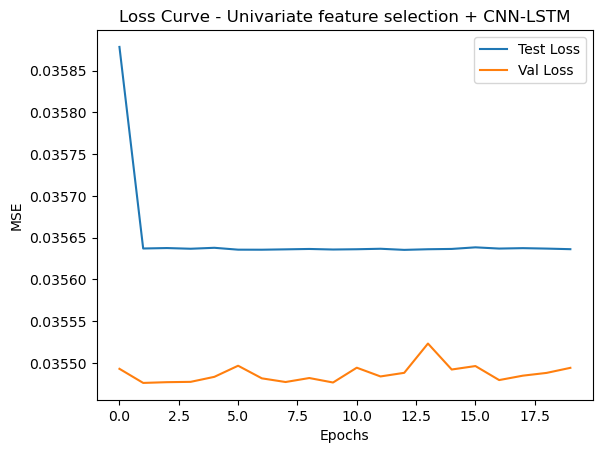

In [48]:
## testing the data on test dataset
X_test_seq, y_test_seq = create_sequences(X_test_kbest, y_test, window_size)
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f'Test MAE: {mae:.2f} | Test MSE: {loss:.2f}')

# Plot learning curve
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Univariate feature selection + CNN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [49]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 5s 479us/step


In [50]:
# Example
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.48
Actual MSE: 9122.91


## DBN - LSTM model on univariate feature selections:

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0360 - mae: 0.1544 - val_loss: 0.0355 - val_mae: 0.1540
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1531
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1547
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0356 - val_mae: 0.1524
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1526
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1538
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1540
Epoch 9/20
9822/9822 ━━━━━━━━━━━

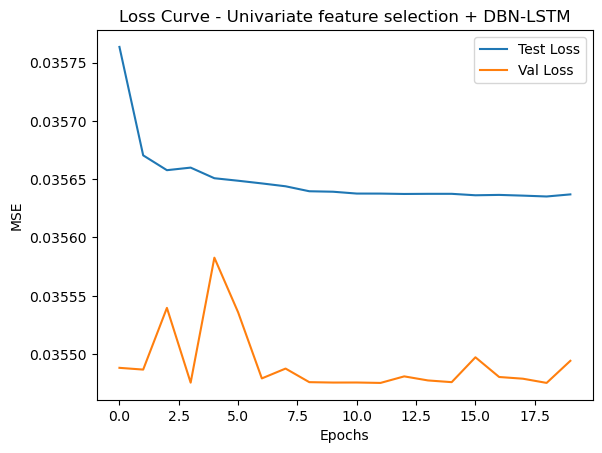

In [52]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert y to 1D array if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# -------- DBN Layer using RBM --------
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, random_state=42)

X_train_rbm = rbm1.fit_transform(X_train_kbest)
X_train_rbm = rbm2.fit_transform(X_train_rbm)

X_test_rbm = rbm1.transform(X_test_kbest)
X_test_rbm = rbm2.transform(X_test_rbm)

# ------ Convert DBN output to sequences for LSTM ------
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(X_train_rbm, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_rbm, y_test, window_size)

# ------ LSTM Model ------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ------ Train ------
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

# ------ Evaluate ------
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {loss:.2f} | Test MAE: {mae:.2f}")
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Univariate feature selection + DBN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [53]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 8s 751us/step


In [54]:
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.47
Actual MSE: 9122.98


## Combination-3: Random forest regressor + CNN-LSTM model

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Convert train/test arrays into DataFrames only once with correct column names
X_train_df = pd.DataFrame(X_train, columns=train_X.columns)
X_test_df = pd.DataFrame(X_test, columns=train_X.columns)

# Use fewer trees if needed for speed; use warm_start for iterative tuning if needed later
rf = RandomForestRegressor(
    n_estimators=50,         # You can try 25–50 for faster training
    max_depth=15,            # Limit tree depth to avoid overfitting and speed up training
    max_features='sqrt',     # Faster and sometimes better generalization
    random_state=42,
    n_jobs=-1,               # Use all cores
    verbose=1                # See progress (optional)
)

# Train the model
rf.fit(X_train_df, y_train.ravel())

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X_train_df.columns)

# Select top 20 important features
top_features = importances.nlargest(20).index

# Reduce training and test sets to top features
X_train_rf = X_train_df[top_features]
X_test_rf = X_test_df[top_features]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [57]:
# model building  using CNN-LSTM
# Parameters
window_size = 10  # Number of time steps in each sequence
n_features = X_train_rf.shape[1]

X_seq, y_seq = create_sequences(X_train_rf, y_train, window_size)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_seq, y_seq, validation_split=0.2, epochs=20, batch_size=64)

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 8, 64)          │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,153 (160.75 KB)

 Trainable params: 41,153 (160.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0365 - mae: 0.1551 - val_loss: 0.0355 - val_mae: 0.1531
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1528
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0356 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1529
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0357 - mae: 0.1541 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1544
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1537
Epoch 9/20
9822/9822 ━━━━━━━━━━━

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 6s 569us/step - loss: 0.0355 - mae: 0.1538
Test MAE: 0.15 | Test MSE: 0.04


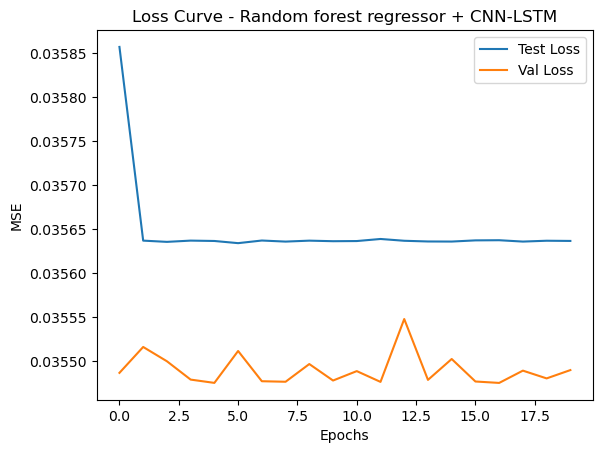

In [58]:
## testing the data on test dataset
X_test_seq, y_test_seq = create_sequences(X_test_rf, y_test, window_size)
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f'Test MAE: {mae:.2f} | Test MSE: {loss:.2f}')

# Plot learning curve
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Random forest regressor + CNN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [59]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 5s 478us/step


In [60]:
# Example
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 78.02
Actual MSE: 9120.83


## DBN-LSTM model on the Random forest regressor selection features

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0361 - mae: 0.1545 - val_loss: 0.0355 - val_mae: 0.1540
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1541 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1539
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1538
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1541
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1541
Epoch 9/20
9822/9822 ━━━━━━━━━━━

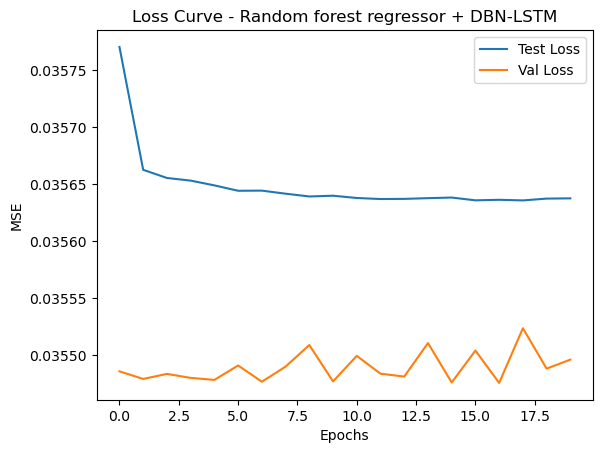

In [62]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert y to 1D array if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# -------- DBN Layer using RBM --------
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, random_state=42)

X_train_rbm = rbm1.fit_transform(X_train_rf)
X_train_rbm = rbm2.fit_transform(X_train_rbm)

X_test_rbm = rbm1.transform(X_test_rf)
X_test_rbm = rbm2.transform(X_test_rbm)

# ------ Convert DBN output to sequences for LSTM ------
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(X_train_rbm, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_rbm, y_test, window_size)

# ------ LSTM Model ------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ------ Train ------
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

# ------ Evaluate ------
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {loss:.2f} | Test MAE: {mae:.2f}")
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Random forest regressor + DBN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [63]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 8s 737us/step


In [64]:
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 78.07
Actual MSE: 9122.25


## Combination-4: Variance Threshold + CNN-LSTM

In [66]:
from sklearn.feature_selection import VarianceThreshold
X_train_df = pd.DataFrame(X_train, columns = train_X.columns)
X_test_df = pd.DataFrame(X_test, columns = train_X.columns)
selector = VarianceThreshold(threshold=0.01)
X_train_var = selector.fit_transform(X_train)

# Get selected features
selected_features = X_train_df.columns[selector.get_support()]
X_train_var = pd.DataFrame(X_train_var, columns=selected_features, index=X_train_df.index)
X_test_var = pd.DataFrame(X_test_df[selected_features], columns=selected_features, index=X_test_df.index)

In [67]:
# model building  using CNN-LSTM
# Parameters
window_size = 10  # Number of time steps in each sequence
n_features = X_train_var.shape[1]

X_seq, y_seq = create_sequences(X_train_var, y_train, window_size)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_seq, y_seq, validation_split=0.2, epochs=20, batch_size=64)

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 8, 64)          │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,465 (150.25 KB)

 Trainable params: 38,465 (150.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0365 - mae: 0.1551 - val_loss: 0.0355 - val_mae: 0.1540
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1538
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1530
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1539
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1532
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 9/20
9822/9822 ━━━━━━━━━━━

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 6s 551us/step - loss: 0.0354 - mae: 0.1533
Test MAE: 0.15 | Test MSE: 0.04


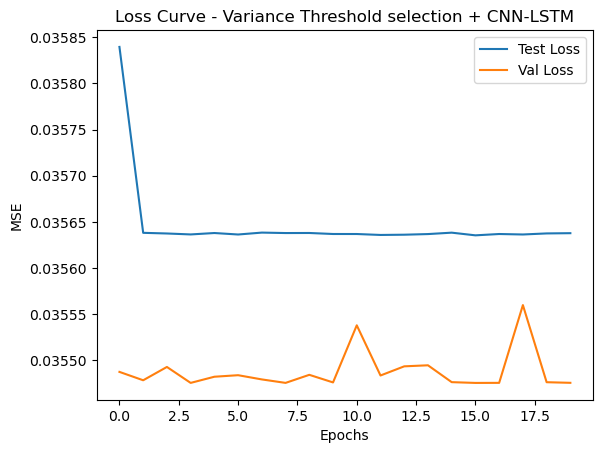

In [68]:
## testing the data on test dataset
X_test_seq, y_test_seq = create_sequences(X_test_var, y_test, window_size)
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f'Test MAE: {mae:.2f} | Test MSE: {loss:.2f}')

# Plot learning curve
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Variance Threshold selection + CNN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [69]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 5s 468us/step


In [70]:
# Example
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [71]:
# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.77
Actual MSE: 9117.54


## DBN-LSTM model on variance threshold feature selection

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0360 - mae: 0.1542 - val_loss: 0.0355 - val_mae: 0.1536
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1528
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0356 - val_mae: 0.1552
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1536
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1529
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1537
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1541 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 9/20
9822/9822 ━━━━━━━━━━━

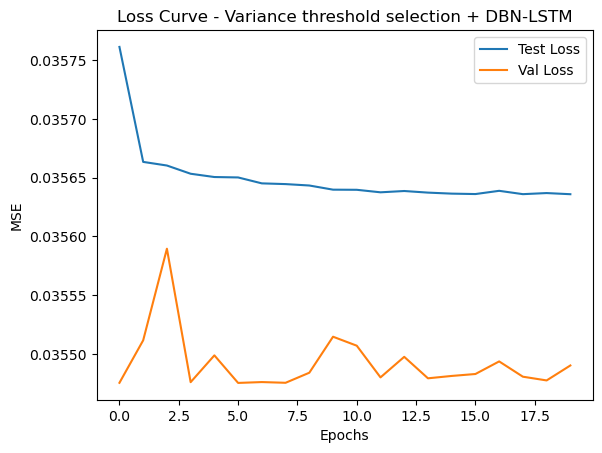

In [72]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert y to 1D array if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# -------- DBN Layer using RBM --------
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, random_state=42)

X_train_rbm = rbm1.fit_transform(X_train_var)
X_train_rbm = rbm2.fit_transform(X_train_rbm)

X_test_rbm = rbm1.transform(X_test_var)
X_test_rbm = rbm2.transform(X_test_rbm)

# ------ Convert DBN output to sequences for LSTM ------
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(X_train_rbm, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_rbm, y_test, window_size)

# ------ LSTM Model ------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ------ Train ------
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

# ------ Evaluate ------
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {loss:.2f} | Test MAE: {mae:.2f}")
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Variance threshold selection + DBN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [73]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 8s 736us/step


In [74]:
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 78.02
Actual MSE: 9120.88


## Combination-5: Lasso - regularization selection + CNN-LSTM

In [76]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
X_train_df = pd.DataFrame(X_train, columns = train_X.columns)
X_test_df = pd.DataFrame(X_test, columns = train_X.columns)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train.ravel())

selector = SelectFromModel(lasso, prefit=True)
X_train_lasso = selector.transform(X_train)
selected_features = X_train_df.columns[selector.get_support()]

X_train_lasso = pd.DataFrame(X_train_lasso, columns=selected_features, index=X_train_df.index)
X_test_lasso = pd.DataFrame(X_test_df[selected_features], columns=selected_features, index=X_test_df.index)

In [77]:
# model building  using CNN-LSTM
# Parameters
window_size = 10  # Number of time steps in each sequence
n_features = X_train_lasso.shape[1]

X_seq, y_seq = create_sequences(X_train_lasso, y_train, window_size)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_seq, y_seq, validation_split=0.2, epochs=20, batch_size=64)

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,505 (146.50 KB)

 Trainable params: 37,505 (146.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0363 - mae: 0.1548 - val_loss: 0.0355 - val_mae: 0.1544
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1531
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0356 - mae: 0.1537 - val_loss: 0.0355 - val_mae: 0.1542
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1532
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1535
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.0357 - mae: 0.1540 - val_loss: 0.0355 - val_mae: 0.1541
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0355 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1540
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0357 - mae: 0.1541 - val_loss: 0.0355 - val_mae: 0.1529
Epoch 9/20
9822/9822 ━━━━━━━━━━━

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 6s 550us/step - loss: 0.0355 - mae: 0.1536
Test MAE: 0.15 | Test MSE: 0.04


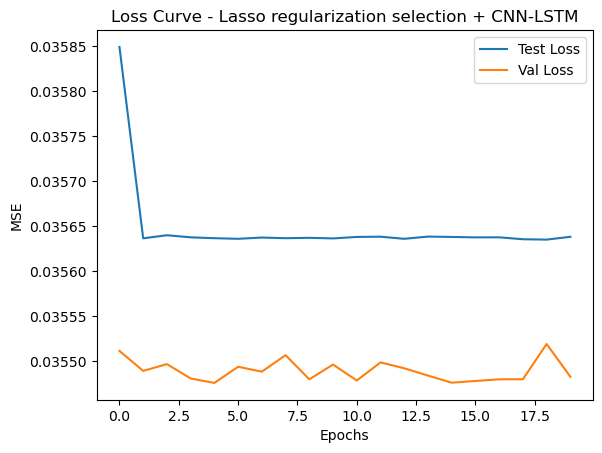

In [78]:
## testing the data on test dataset
X_test_seq, y_test_seq = create_sequences(X_test_lasso, y_test, window_size)
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f'Test MAE: {mae:.2f} | Test MSE: {loss:.2f}')

# Plot learning curve
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Lasso regularization selection + CNN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [79]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 5s 473us/step


In [80]:
# Example
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [81]:
# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.93
Actual MSE: 9119.01


## DBN-LSTM model for Lasso regularization selection:

/Users/venkatakoushikakella/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.0361 - mae: 0.1544 - val_loss: 0.0355 - val_mae: 0.1529
Epoch 2/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0358 - mae: 0.1541 - val_loss: 0.0356 - val_mae: 0.1524
Epoch 3/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1526
Epoch 4/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1543
Epoch 5/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1539 - val_loss: 0.0355 - val_mae: 0.1545
Epoch 6/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1533
Epoch 7/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0356 - mae: 0.1536 - val_loss: 0.0355 - val_mae: 0.1534
Epoch 8/20
9822/9822 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0357 - mae: 0.1541 - val_loss: 0.0355 - val_mae: 0.1542
Epoch 9/20
9822/9822 ━━━━━━━━━━━

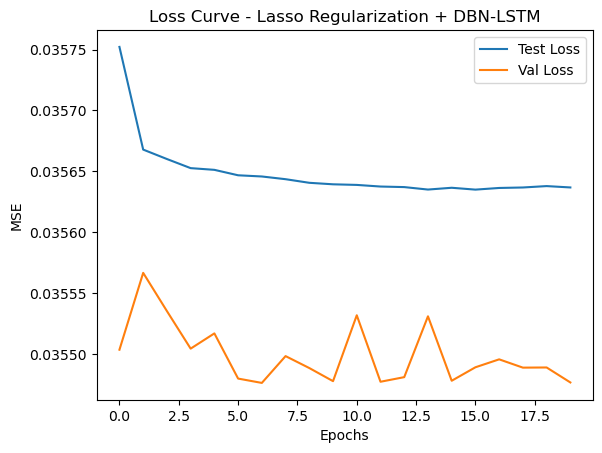

In [82]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert y to 1D array if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# -------- DBN Layer using RBM --------
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, random_state=42)

X_train_rbm = rbm1.fit_transform(X_train_lasso)
X_train_rbm = rbm2.fit_transform(X_train_rbm)

X_test_rbm = rbm1.transform(X_test_lasso)
X_test_rbm = rbm2.transform(X_test_rbm)

# ------ Convert DBN output to sequences for LSTM ------
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 10
X_train_seq, y_train_seq = create_sequences(X_train_rbm, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_rbm, y_test, window_size)

# ------ LSTM Model ------
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ------ Train ------
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

# ------ Evaluate ------
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {loss:.2f} | Test MAE: {mae:.2f}")
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve - Lasso Regularization + DBN-LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [83]:
y_pred = model.predict(X_test_seq)

10523/10523 ━━━━━━━━━━━━━━━━━━━━ 8s 742us/step


In [84]:
y_pred_actual = rul_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = rul_scaler.inverse_transform(y_test_seq.reshape(-1,1))

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute MAE and MSE in original scale
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)

print(f"Actual MAE: {mae_actual:.2f}")
print(f"Actual MSE: {mse_actual:.2f}")

Actual MAE: 77.67
Actual MSE: 9118.02


## Conclusion of the above methodology:
1. Based on the above observations, the mean absolute error and mean squared error values of each of the combinations are compared and the conclusion is that none of the combinations are performing as well as expected.
2. a Mean absolute error in the range of 75-77 for all models indicate that the models are predicting failures 75 time units later than the probable failure time, which will render the prediction useless as it is a long time in terms of automotive standards.
3. Mean squared error value of ~ 9000 range indicate that the model is struggling to provide accurate predictions. This might be due to presence of outliers in the numerical columns. The reason these outliers are not dealt with durng preprocessing is because of the fact that these are assumed to be important sensor data which are important for Predictive maintenance or remaining useful life prediction.
4. Initial idea of employing SVM selecton, relief algorithm, forward selection, backward elimination could not be implemented as these methods are computationally heave especially on such large dataset and the execution has not completed even after running the program for over 8-9 hours, hence these methods were replaced with some computationally feasible methods.
5. Netiher CNN-LSTM nor DBN-LSTM models, which were one of the most widely used models in the RUL prediction in aerospace and aircraft industry, were not able to perform on par with the Automobile component dataset.
6. The lack of exact knowledge on the parameters being worked on, has led to a very deliberate attempt at not cleaning the dataset to a large extent, which might be a contributing factor to the low performance of both the models chosen.